# 1. EFFECTIVENESS OF THE ONLINE LEARNING RULE

## Setup the environment

#### Adding the source code path

In [1]:
import sys  
sys.path.insert(1, './../../ESN-IP/IP/.')

In [2]:
import random

random.seed(10)

#### Import experiment data 

In [3]:
from DATA import NARMA10

data = NARMA10(True, [80,0,20])

X_TR, Y_TR = data.TR()
X_VAL, Y_VAL = data.VAL()
X_TS, Y_TS = data.TS()

## NOT PRETRAINED RESERVOIR

In [4]:
N_UNITS = 250

In [5]:
from IPReservoir import IPReservoir
from ESN import Reservoir
from IntrinsicPlasticity import IPMask

simple_reservoir = Reservoir(N = N_UNITS, sparsity=0.9, ro_rescale=0.25, bias = True)

W_x = simple_reservoir.W_x
W_u = simple_reservoir.W_u
b_x = simple_reservoir.b_x
b_u = simple_reservoir.b_u

In [6]:
simple_reservoir.max_eigs()

tensor(0.2500)

## PRETRANING WITH OLD STYLE INTRINSIC PLASTICITY

In [7]:
ip_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.normalMask(N_UNITS), bias = True)

ip_reservoir.W_x = W_x
ip_reservoir.W_u = W_u
ip_reservoir.b_x = b_x
ip_reservoir.b_u = b_u

Check the prior data distribution.

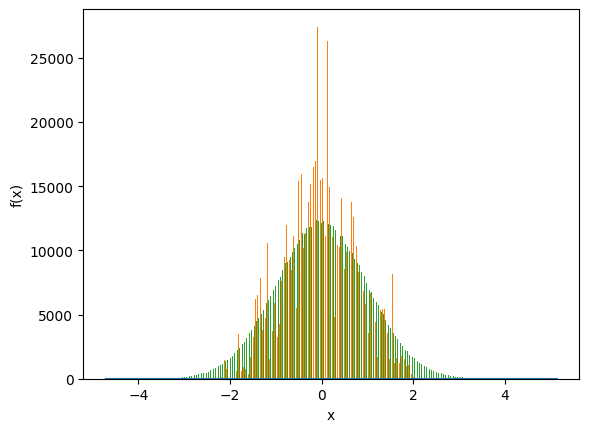

In [8]:
ip_reservoir.pre_train(X_TR, 0, 0)
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

With a large number of units, low spectral radius and a high sparsity, reservoir is more or less already Gaussian.

In [9]:
ip_reservoir.pre_train(X_TR, eta=0.00005, epochs=15,  learning_rule="online", verbose=True) #16

No transient applied. Reservoir was already warmed up
- Epoch: 1) | KL Divergence value: 2428.576904296875.
- Epoch: 2) | KL Divergence value: 2260.115234375.
- Epoch: 3) | KL Divergence value: 2117.382568359375.
- Epoch: 4) | KL Divergence value: 2000.142578125.
- Epoch: 5) | KL Divergence value: 1905.1646728515625.
- Epoch: 6) | KL Divergence value: 1829.444580078125.
- Epoch: 7) | KL Divergence value: 1771.53955078125.
- Epoch: 8) | KL Divergence value: 1729.5111083984375.
- Epoch: 9) | KL Divergence value: 1700.788330078125.
- Epoch: 10) | KL Divergence value: 1683.00244140625.
- Epoch: 11) | KL Divergence value: 1673.755615234375.
- Epoch: 12) | KL Divergence value: 1671.0487060546875.
- Epoch: 13) | KL Divergence value: 1674.1171875.
- Epoch: 14) | KL Divergence value: 1683.2808837890625.
- Epoch: 15) | KL Divergence value: 1698.8980712890625.


In [10]:
print(f"Spectral radius - initial: { ip_reservoir.max_eigs(scaled = False)} - final: {ip_reservoir.max_eigs()} ")

Spectral radius - initial: 0.2499997764825821 - final: 0.8423085808753967 


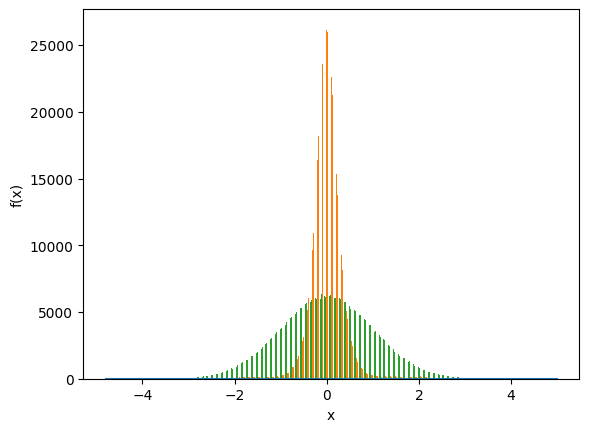

In [11]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.sample_targets(X_TR.shape[0], overwrite=True)
ip_reservoir.plot_global_neural_activity()

In [12]:
ip_reservoir.print_IP_stats([0,1])

Unit - (1): [ ACTUAL_MEAN == (-0.07571204006671906)  ACTUAL_STD == (0.2522300183773041)][ TARGET_MEAN == (0.001606761827133596) TARGET_STD == (0.9952325224876404)]
Unit - (2): [ ACTUAL_MEAN == (-0.018661590293049812)  ACTUAL_STD == (0.18573389947414398)][ TARGET_MEAN == (-0.0004939702921546996) TARGET_STD == (0.9971072673797607)]
Overall network: [ACTUAL_MEAN == (0.0133502883836627)  ACTUAL_STD == (0.35673844814300537)]


In [13]:
ip_reservoir.max_eigs()

tensor(0.8423)

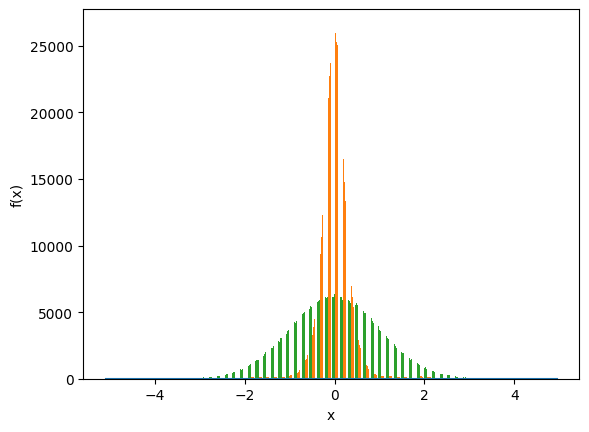

In [14]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.sample_targets(X_TR.shape[0], overwrite=True)
ip_reservoir.plot_global_neural_activity()

In [15]:
ip_reservoir.rescale_weights(0.98)

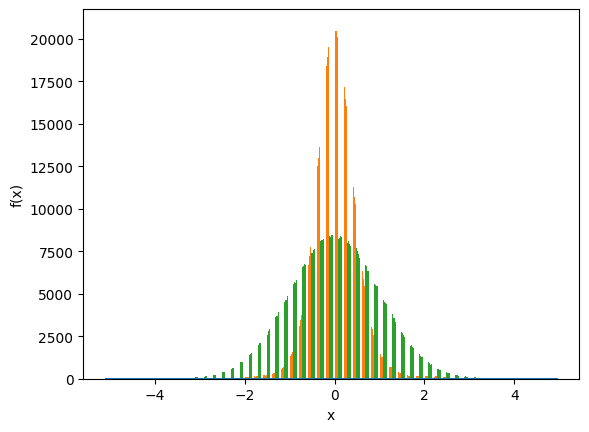

In [16]:
ip_reservoir.predict(X_TR, save_gradients=False, save_states=True)
ip_reservoir.plot_global_neural_activity()

## BIMODAL MIXTURE OF GAUSSIAN

In [17]:
# It seems that switching the "old" bias terms down (input bias and recurrent weights bias), 
# helps the algorithm converging earlier, letting the IP bias dominate the linear translation. 

bimodal_reservoir = IPReservoir(N = N_UNITS, mask=IPMask.mixedBimodalMask(N_UNITS), bias = False)

bimodal_reservoir.W_x = W_x
bimodal_reservoir.W_u = W_u
#bimodal_reservoir.b_x = b_x
#bimodal_reservoir.b_u = b_u

In [18]:
bimodal_reservoir.pre_train(X_TR, eta= 0.0000025, epochs=20,  learning_rule="online", verbose=True)

- Epoch: 1) | KL Divergence value: 3480.67236328125.
- Epoch: 2) | KL Divergence value: 3210.364501953125.
- Epoch: 3) | KL Divergence value: 2963.13720703125.
- Epoch: 4) | KL Divergence value: 2740.83154296875.
- Epoch: 5) | KL Divergence value: 2544.1318359375.
- Epoch: 6) | KL Divergence value: 2372.71484375.
- Epoch: 7) | KL Divergence value: 2225.4736328125.
- Epoch: 8) | KL Divergence value: 2100.727294921875.
- Epoch: 9) | KL Divergence value: 1996.4654541015625.
- Epoch: 10) | KL Divergence value: 1910.5264892578125.
- Epoch: 11) | KL Divergence value: 1840.7587890625.
- Epoch: 12) | KL Divergence value: 1785.165771484375.
- Epoch: 13) | KL Divergence value: 1742.0191650390625.
- Epoch: 14) | KL Divergence value: 1709.954345703125.
- Epoch: 15) | KL Divergence value: 1688.063232421875.
- Epoch: 16) | KL Divergence value: 1676.0467529296875.
- Epoch: 17) | KL Divergence value: 1674.4815673828125.
- Epoch: 18) | KL Divergence value: 1685.298583984375.
- Epoch: 19) | KL Divergenc

In [19]:
print(f"Spectral radius - initial: { bimodal_reservoir.max_eigs(scaled = False)} - final: {bimodal_reservoir.max_eigs()} ")

Spectral radius - initial: 0.2499997764825821 - final: 0.5573744177818298 


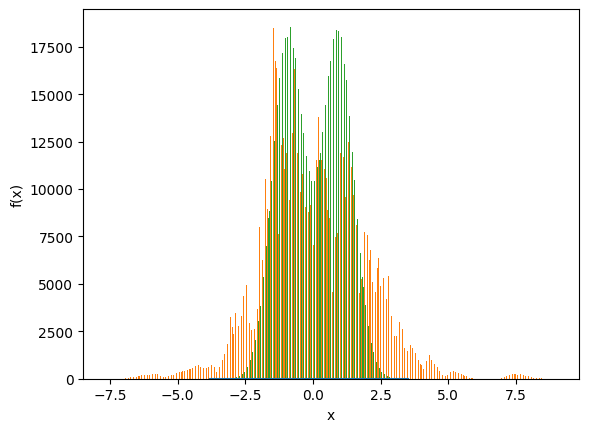

In [20]:
bimodal_reservoir.predict(X_TR, save_gradients=False, save_states=True)
bimodal_reservoir.plot_global_neural_activity()

In [21]:
bimodal_reservoir.max_eigs()

tensor(0.5574)

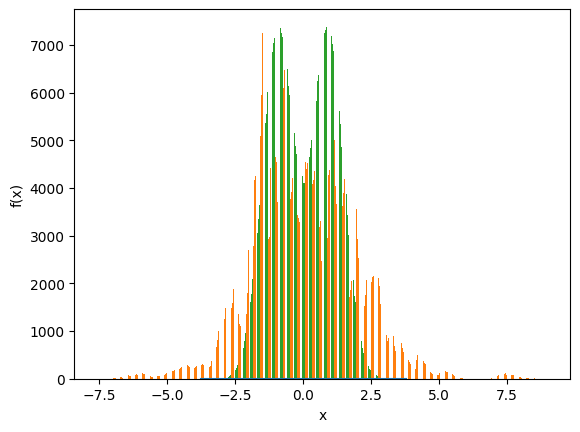

In [22]:
bimodal_reservoir.predict(X_TS, save_gradients=False, save_states=True)
bimodal_reservoir.sample_targets(X_TS.shape[0], overwrite=True)
bimodal_reservoir.plot_global_neural_activity()

In [23]:
bimodal_reservoir.print_IP_stats([0,1,4,7,8,9])

Unit - (1): [ ACTUAL_MEAN == (-2.0610976219177246)  ACTUAL_STD == (0.14948411285877228)][ TARGET_MEAN == (-0.9355978965759277) TARGET_STD == (0.5927953720092773)]
Unit - (2): [ ACTUAL_MEAN == (0.2803040146827698)  ACTUAL_STD == (0.03471118211746216)][ TARGET_MEAN == (0.9054386615753174) TARGET_STD == (0.5799314975738525)]
Unit - (5): [ ACTUAL_MEAN == (-0.666762113571167)  ACTUAL_STD == (0.050599150359630585)][ TARGET_MEAN == (-0.9384252429008484) TARGET_STD == (0.5925408005714417)]
Unit - (8): [ ACTUAL_MEAN == (0.46011465787887573)  ACTUAL_STD == (0.13807126879692078)][ TARGET_MEAN == (0.9290587902069092) TARGET_STD == (0.5773136615753174)]
Unit - (9): [ ACTUAL_MEAN == (-0.7100691199302673)  ACTUAL_STD == (0.05333093926310539)][ TARGET_MEAN == (-0.9172950387001038) TARGET_STD == (0.5774657130241394)]
Unit - (10): [ ACTUAL_MEAN == (1.7057626247406006)  ACTUAL_STD == (0.21416087448596954)][ TARGET_MEAN == (0.9233913421630859) TARGET_STD == (0.5759472250938416)]
Overall network: [ACTUAL_M

## EVAUALTUION IN ESN

In [24]:
from ESN import EchoStateNetwork

simple_reservoir.rescale_weights(0.96)
simple_reservoir.max_eigs()

simple_esn = EchoStateNetwork(simple_reservoir)
ip_esn = EchoStateNetwork(ip_reservoir)
bimodal_esn = EchoStateNetwork(bimodal_reservoir)

simple_esn.train(X_TR, Y_TR, 0)
ip_esn.train(X_TR, Y_TR, 0)
bimodal_esn.train(X_TR, Y_TR, 0)


Reservoir warmed up with the first 100 time steps
Reservoir warmed up with the first 100 time steps
Reservoir warmed up with the first 100 time steps


array([0.265625, 0.25    , 0.234375, ..., 0.265625, 0.28125 , 0.234375],
      dtype=float32)

### COMPARISON ON TEST DATA

In [25]:
from Metrics import MSE

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.02219526055618273


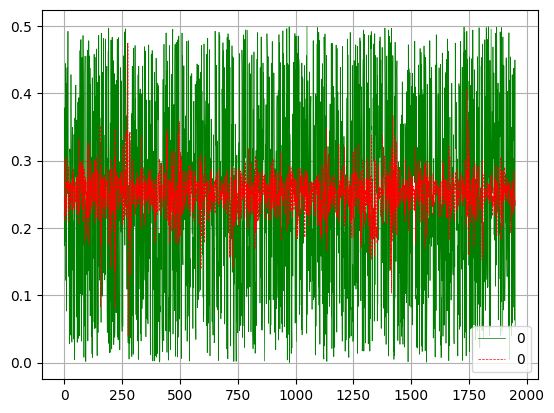

In [26]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { simple_esn.evaluate(X_TS[50:None], Y_TS[50:None], metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.02212837231330886


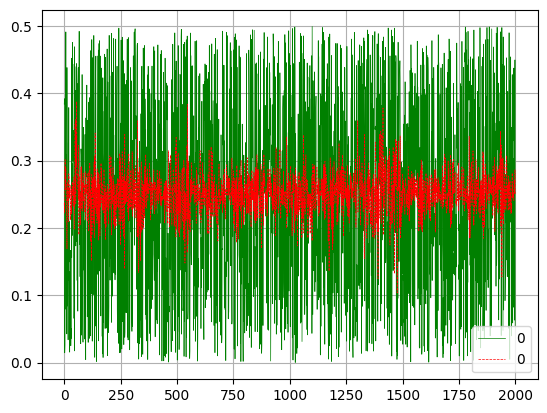

In [27]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { ip_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )

NORMALIZED ROOT-MEAN SQUARE ERROR: 0.022488308393298878


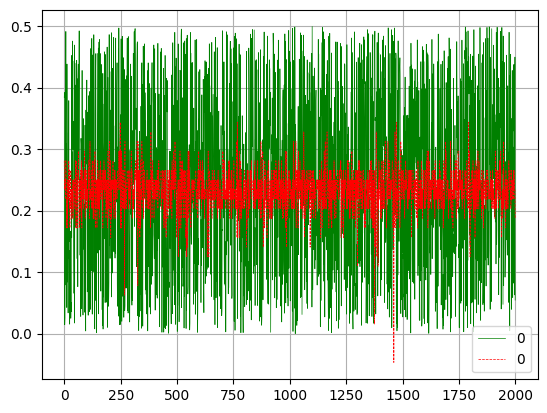

In [28]:
print(f"NORMALIZED ROOT-MEAN SQUARE ERROR: { bimodal_esn.evaluate(X_TS, Y_TS, metric=MSE(), plot=True)}" )

In [29]:
print(f"Spectral radius - initial: { bimodal_esn.reservoir.max_eigs(scaled = False)} - final: {bimodal_esn.reservoir.max_eigs()} ")

Spectral radius - initial: 0.2499997764825821 - final: 0.5573744177818298 


## Lyapunov Exponnet

In [30]:
simple_esn.reservoir.LCE(X_TS)

-0.16290271

In [31]:
ip_esn.reservoir.LCE(X_TS)

-0.15724847

In [32]:
bimodal_esn.reservoir.LCE(X_TS)

-3.3783898

## MEMORY CAPACITY

In [33]:
def mean_mc(esn: EchoStateNetwork, rep):
    mc = 0
    for _ in range(rep):
        mc += esn.MemoryCapacity()

    return mc/rep

In [34]:
mean_mc(simple_esn, 5)

C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.06694e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.06993e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.07057e-09): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\casa_\AppData\Lo

tensor(11.8248)

In [35]:
mean_mc(ip_esn, 5)

tensor(23.9820)

In [36]:
mean_mc(bimodal_esn, 5)

tensor(13.9453)

## DEVIATION FROM LINEARITY

In [37]:
simple_esn.reservoir.de_fi()

0.24937861512579063


In [38]:
ip_esn.reservoir.de_fi()

0.32586650507089926


In [39]:
bimodal_esn.reservoir.de_fi()

0.2580081366308693
